# Práctica 6: Agrupamiento con Kmeans


## Tema:Agrupamiento con K-means

Est: Santiago Tene

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## EDA Del dataset Diabetes.csv  -> Análisis Inicial en Python

In [2]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,627.000,50,tested_positive
1,1,85,66,29,0,26.6,351.000,31,tested_negative
2,8,183,64,0,0,23.3,672.000,32,tested_positive
3,1,89,66,23,94,28.1,167.000,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [5]:
dataframe.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

INFORMACIÓN DEL DATASET:
Número de instancias: 768
Número de atributos: 8 más class, en total 9

Significado de cada uno de los atributos:

1. Número de veces embarazada
2. Concentración plasmática de glucosa a las 2 horas en una prueba oral de tolerancia a la glucosa
3. Tensión arterial diastólica (mm Hg)
4. Espesor del pliegue cutáneo del tríceps (mm)
5. Insulina sérica a las 2 horas (mu U/ml)
6. Índice de masa corporal (peso en kg/(altura en m)^2)
7. Función pedigrí de la diabetes
8. Edad (años)
9. Variable de clase (0 o 1)



Se realiza un .describe para ver la cantidad total de registros, en este caso tenemos 768 registros

In [3]:
dataframe.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,347.079349,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,254.431659,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000


<Axes: xlabel='age', ylabel='Count'>

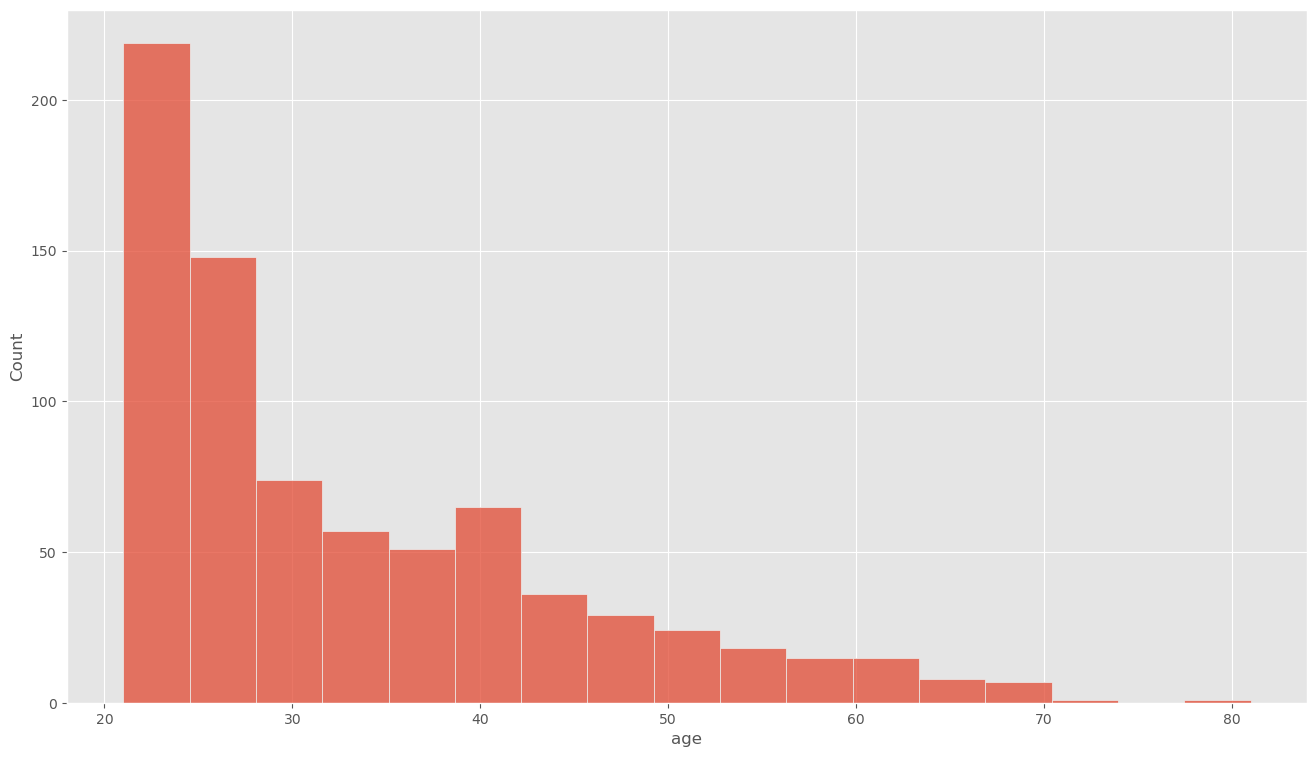

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataframe['age'])

## Preprocesamiento de Datos en Python

Identificar y manejar valores faltantes y Normalizar:

In [10]:
print(dataframe.isnull().sum())

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64


Verificando que no existen nulos, no se van a manejar valores faltantes, es decir no haremos la eliminación ni la imputación de datos.

## Implementación de K-means en Python:

## Definimos la entrada

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas.

In [64]:
X = np.array(dataframe[["preg","insu", "mass","age"]])
y = np.array(dataframe['class'])
X.shape

(768, 4)

## Obtener el valor K
Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

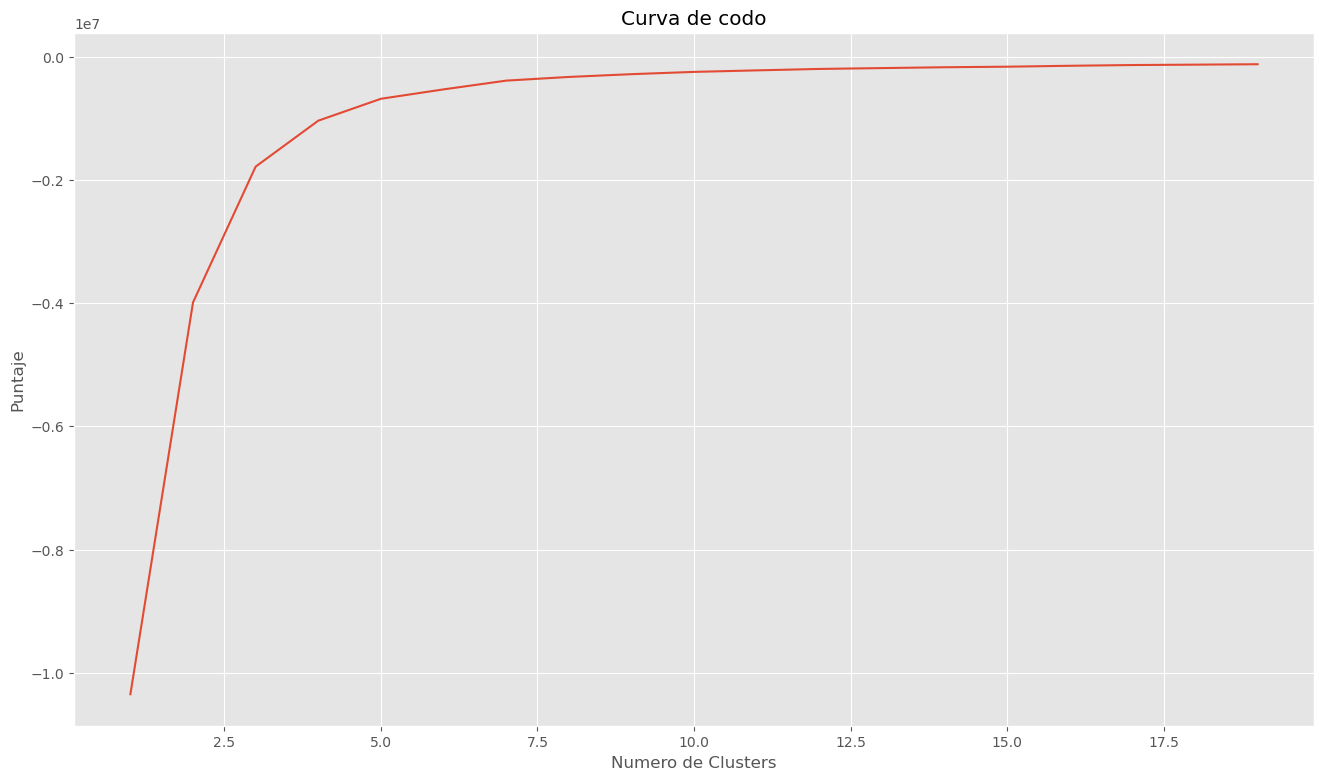

In [65]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Puntaje')
plt.title('Curva de codo')
plt.show()

Experimentar con diferentes valores de k y evaluar las métricas de rendimiento. (utilizar el atributo inercia total inertia_)

/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

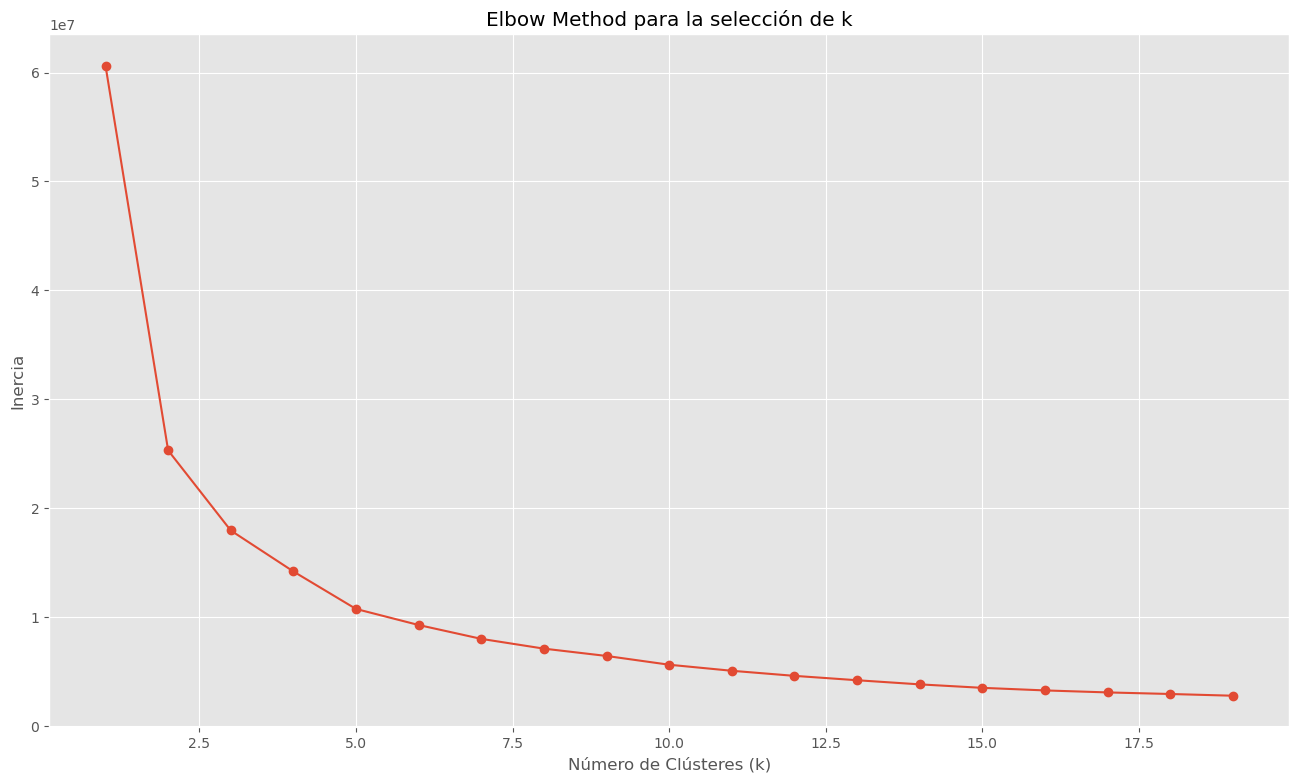

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = np.array(dataframe[["pedi", "plas", "insu"]])

# Experimenta con diferentes valores de k
k_values = range(1, 20)

# Almacena las inercias para cada valor de k
inertias = []

for k in k_values:
    # Crea y ajusta el modelo K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Almacena la inercia (suma de las distancias cuadradas dentro del clúster)
    inertias.append(kmeans.inertia_)

# Visualiza la inercia para diferentes valores de k
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Elbow Method para la selección de k')
plt.show()

## Ejecutamos K-Means

Ejecutamos el algoritmo para 3 clusters y obtenemos las etiquetas y los centroids.

In [67]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  3.99591002  13.50511247  30.83353783  33.86298569]
 [  3.52892562 157.90495868  33.85247934  31.84710744]
 [  3.91891892 445.10810811  35.14594595  34.13513514]]


/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
import matplotlib.pyplot as plt
# Predicting the clusters
labels = kmeans.predict(X)

# Obtener los centroides
C = kmeans.cluster_centers_

# Colores y asignación
colores = ['red', 'green', 'blue']
asignar = [colores[row] for row in labels]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

<Figure size 1600x900 with 0 Axes>

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

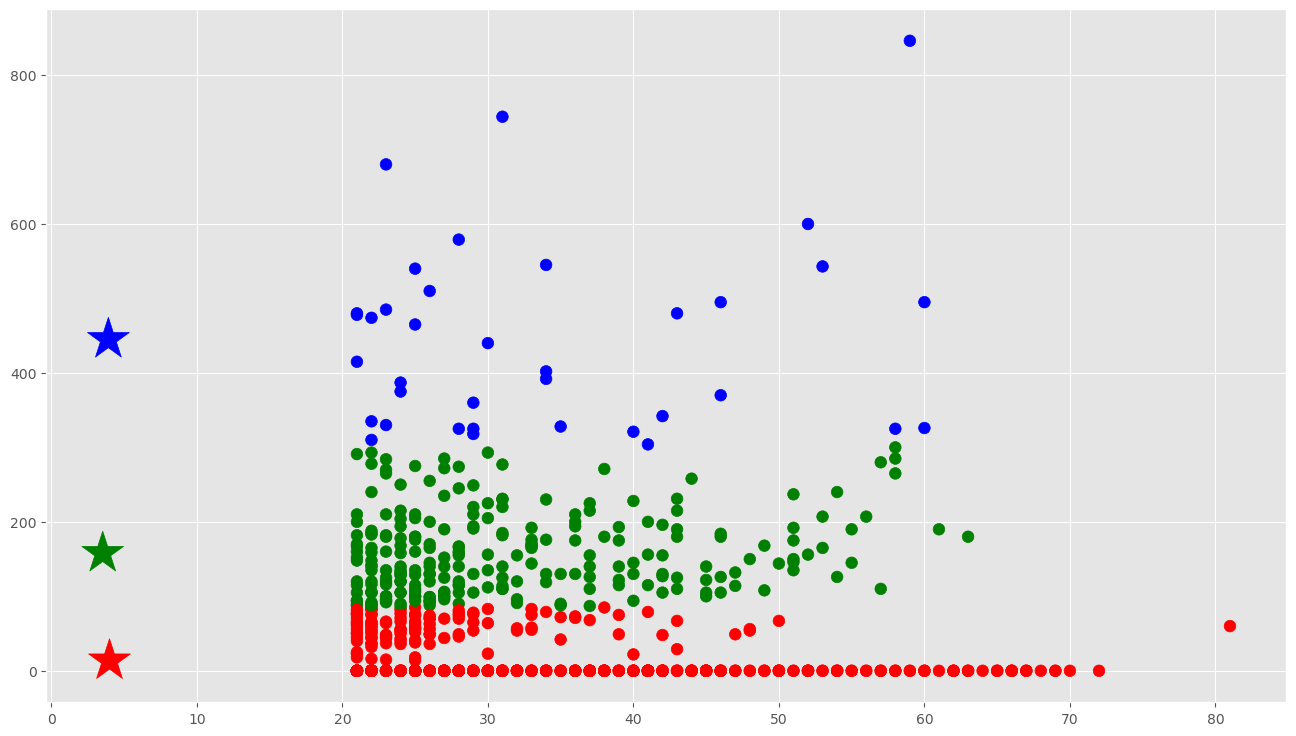

In [49]:
# Getting the values and plotting it
f1 = dataframe['age'].values
f2 = dataframe['insu'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

## Clasificar nuevas muestras

In [50]:
from collections import Counter

print(Counter(labels).keys())
print(Counter(labels).values())

dict_keys([0, 1, 2])
dict_values([489, 242, 37])


In [51]:
kmeans.labels_

array([0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0,

## Implementación de K-means en Python:

Una vez realizado la implementación en WEKA, se pueden deducir varías cosas

## Evaluación en Weka:

Comparar y contrastar los resultados obtenidos en Python y Weka.

Los centoides obtenidos de los atributos 'preg', 'insu', 'mass', 'age'. Se parecen y tienen relación en la parte de WEKA como en la Parte de Python, entonces podemos concluir que los dos tienen similitudes importantes

## Weka 
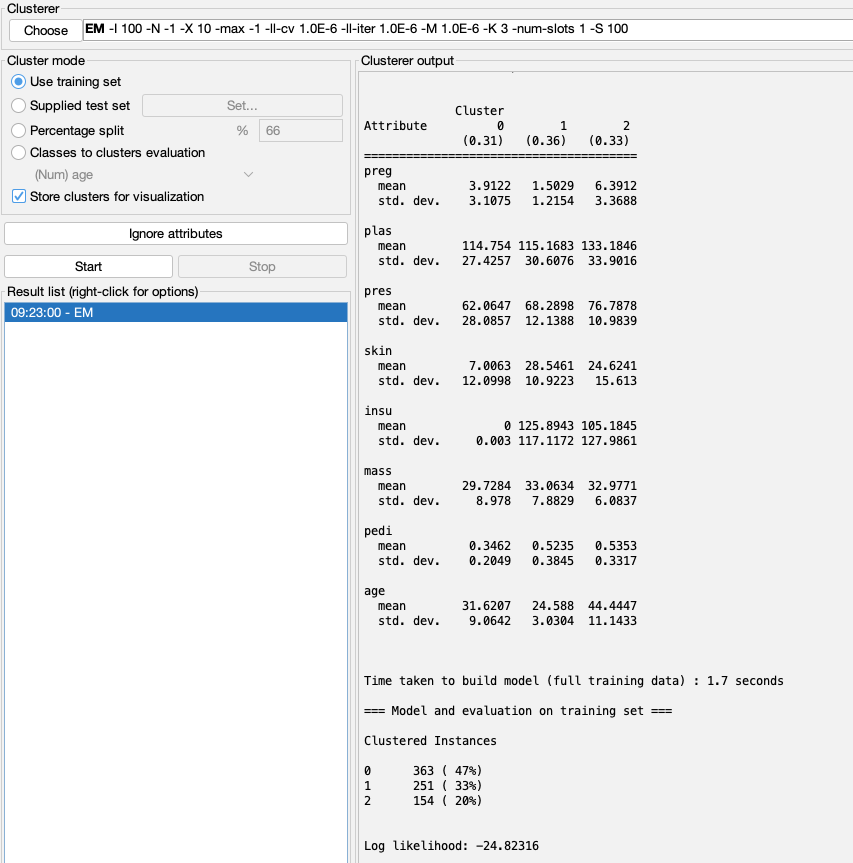 

## Python
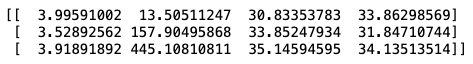

## Evaluando los gráficos

De la misma manera se puede observar como los gráficos tienen relación, estan analizando en la X= 'age' y en la Y='insu', entonces se concluye que tienen semejanza.

## Weka
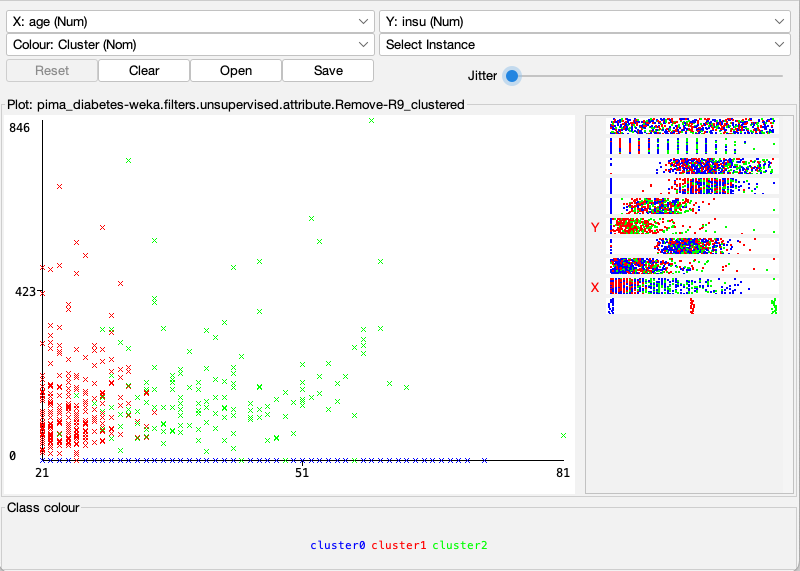

## Python
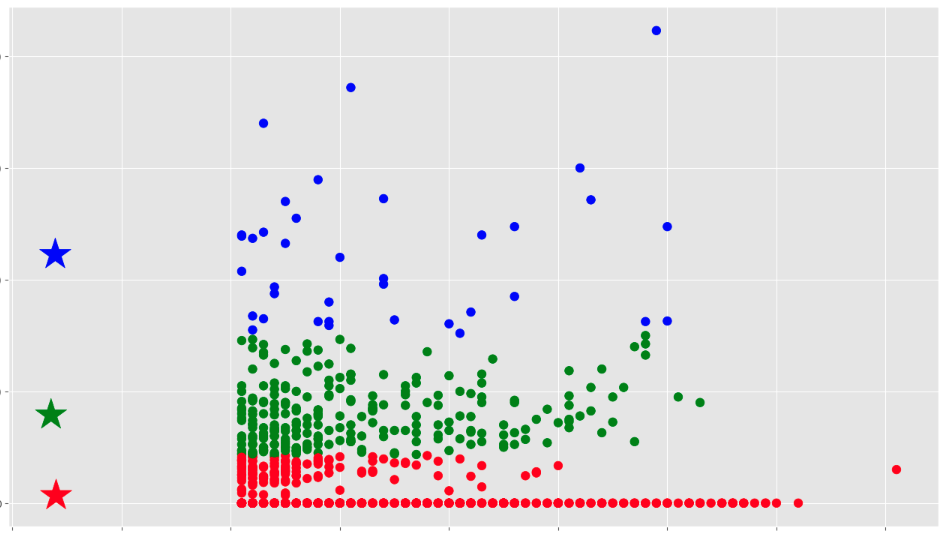